In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

pd.options.display.max_rows = 100
plt.rcParams['figure.dpi'] = 100

pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', 300)

dir_figures = './figures/'
dir_results = './results/'

# 1. Untargeted - Whitebox

In [2]:
df_cifar = pd.DataFrame()
df_cifar = pd.concat([df_cifar, pd.read_csv(dir_results + 'evalQ_untgt-whitebox-cifar10.csv', index_col = 0)])
df_cifar = pd.concat([df_cifar, pd.read_csv(dir_results + 'eval_untgt-whitebox-cifar10.csv', index_col = 0)])
df_cifar = df_cifar[df_cifar['atk_name'] == 'sgd-uap']

In [3]:
df_svhn = pd.DataFrame()
df_svhn = pd.concat([df_svhn, pd.read_csv(dir_results + 'evalQ_untgt-whitebox-svhn.csv', index_col = 0)])
df_svhn = pd.concat([df_svhn, pd.read_csv(dir_results + 'eval_untgt-whitebox-svhn.csv', index_col = 0)])
df_svhn = df_svhn[df_svhn['atk_name'] == 'sgd-uap']

In [4]:
# model_names = list(df_cifar['model_name'].unique())
model_names = ['resnet18',
               'resnet18_sfP',
               'resnet18_sfP-mixup',
               'resnet18_sfP-cutout',
               'resnet18_P2-0.3',
               'resnet18_P3-0.3',
               'resnet18_P4-0.3',
               'resnet20_Q2',
               'resnet20_Q3',
               'resnet20_Q4']

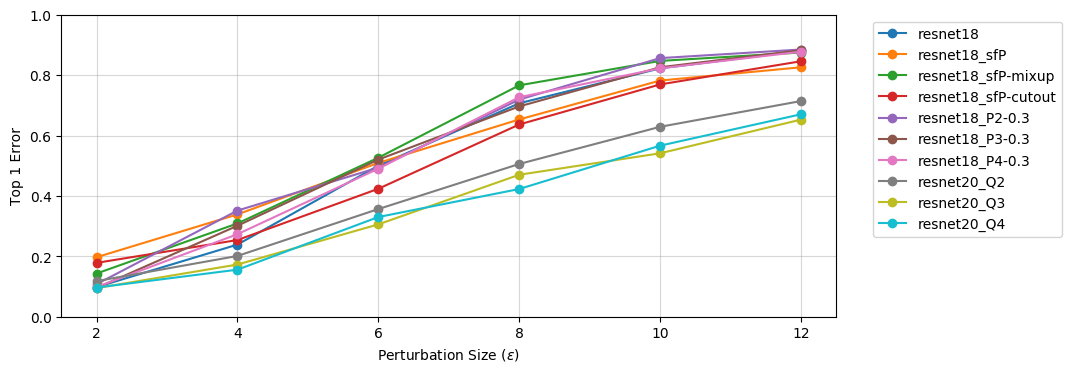

In [5]:
plt.figure(figsize = (10, 4))

for model in model_names:
    temp = df_cifar[df_cifar['model_name'] == model]
    plt.grid(axis = 'both', alpha = 0.5)
    plt.xlabel(r'Perturbation Size ($\varepsilon$)')
    plt.ylabel('Top 1 Error')
    plt.plot(temp['eps'], temp['UER'], marker = 'o', label = model)

plt.ylim([0, 1])
plt.legend(bbox_to_anchor=(1.3, 1))
plt.savefig(dir_figures + 'untgt-whitebox-cifar10.png', dpi = 300, bbox_inches='tight')

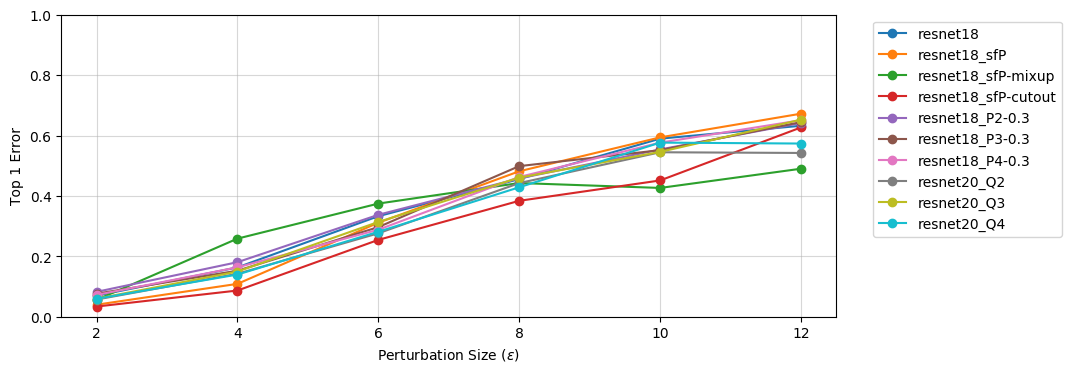

In [6]:
plt.figure(figsize = (10, 4))

for model in model_names:
    temp = df_svhn[df_svhn['model_name'] == model]
    plt.grid(axis = 'both', alpha = 0.5)
    plt.xlabel(r'Perturbation Size ($\varepsilon$)')
    plt.ylabel('Top 1 Error')
    plt.plot(temp['eps'], temp['UER'], marker = 'o', label = model)
    
plt.ylim([0, 1])
plt.legend(bbox_to_anchor=(1.3, 1))
plt.savefig(dir_figures + 'untgt-whitebox-svhn.png', dpi = 300, bbox_inches='tight')

# 2. Untargeted - Transfer

In [7]:
df_cifar = pd.read_csv(dir_results + 'eval_untgt-transfer-cifar10.csv', index_col = 0)
df_svhn = pd.read_csv(dir_results + 'eval_untgt-transfer-svhn.csv', index_col = 0)

In [8]:
model_names = list(df_cifar['model_name'].unique())
atk_sources = list(df_cifar['atk_source'].unique())

In [9]:
model_names

['resnet18',
 'resnet18_sfP',
 'resnet18_sfP-mixup',
 'resnet18_sfP-cutout',
 'resnet18_P2-0.3',
 'resnet18_P2-0.6',
 'resnet18_P3-0.3',
 'resnet18_P3-0.6',
 'resnet18_P4-0.3',
 'resnet18_P4-0.6',
 'resnet18_P4-0.9',
 'resnet20_Q4',
 'resnet20_Q2',
 'resnet20_Q3']

In [10]:
model_names = ['resnet18',
               'resnet18_sfP',
               'resnet18_sfP-mixup',
               'resnet18_sfP-cutout',
               'resnet18_P2-0.3',
               'resnet18_P3-0.3',
               'resnet18_P4-0.3',
               'resnet20_Q2',
               'resnet20_Q3',
               'resnet20_Q4']

In [11]:
atk_sources = model_names

### To make evaluation easier, fix EPS value when doing comparison

In [12]:
temp_cifar = df_cifar[df_cifar['eps'] == 10]
temp_svhn = df_svhn[df_svhn['eps'] == 10]

## Confusion matrix

In [13]:
conf_mat = (temp_cifar.set_index(['model_name', 'atk_source'])['UER']
        .unstack(fill_value = 0)
        .reindex(index = model_names, columns = atk_sources, fill_value=0)
        .rename_axis(None)
        .rename_axis(None, axis = 1))

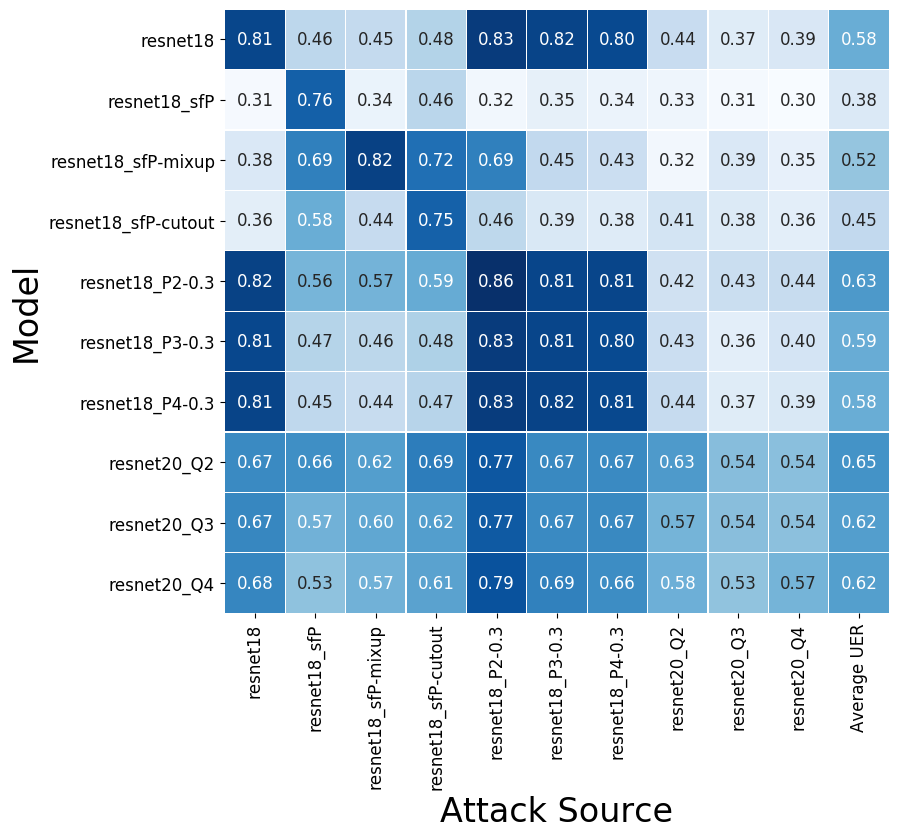

In [14]:
plt.figure(figsize = (12, 8))
sns.heatmap(np.concatenate([conf_mat, np.expand_dims(conf_mat.mean(axis = 1), axis = 1)], axis = 1), cmap = 'Blues', fmt = '.2f', annot = True, cbar = False, annot_kws = {'fontsize' : 12}, square = True, linewidth = 0.1)

plt.xlabel('Attack Source', fontsize = 24)
plt.ylabel('Model', fontsize = 24)

plt.xticks(ticks = np.arange(0.5, len(model_names) + 1, 1), labels = model_names + ['Average UER'], size = 12, rotation = 90)
plt.yticks(ticks = np.arange(0.5, len(model_names), 1), labels = model_names, size = 12, rotation = 0)
plt.savefig(dir_figures + 'untgt-transfer-cifar10.png', dpi = 300, bbox_inches='tight')


In [15]:
conf_mat = (temp_svhn.set_index(['model_name', 'atk_source'])['UER']
        .unstack(fill_value = 0)
        .reindex(index = model_names, columns = atk_sources, fill_value=0)
        .rename_axis(None)
        .rename_axis(None, axis = 1))

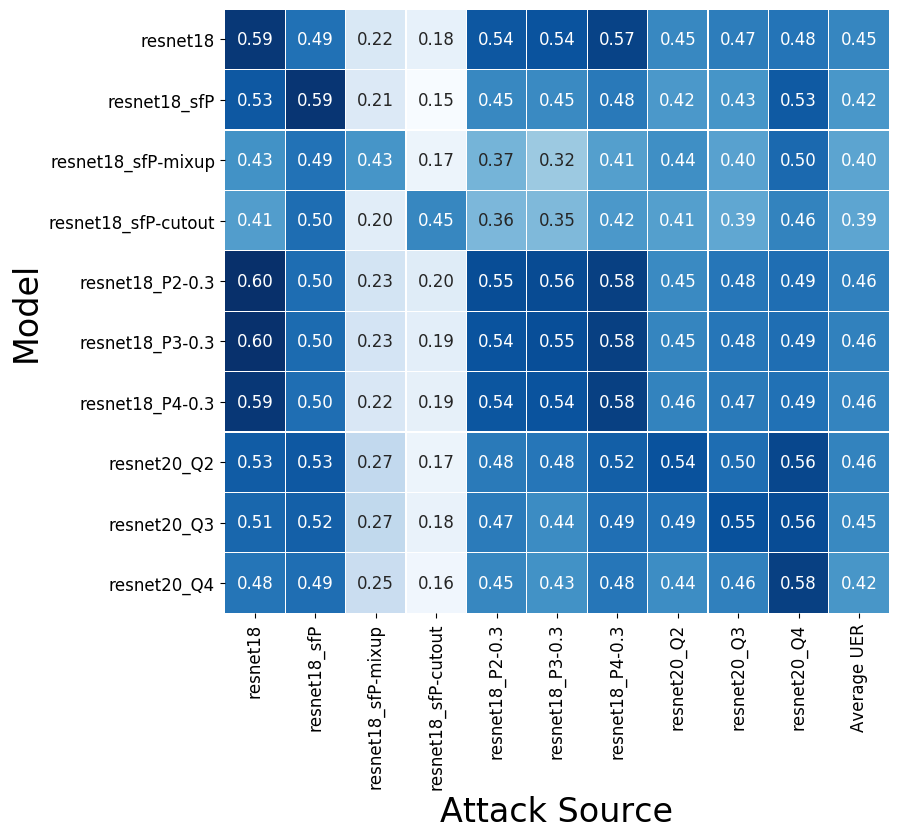

In [16]:
plt.figure(figsize = (12, 8))
sns.heatmap(np.concatenate([conf_mat, np.expand_dims(conf_mat.mean(axis = 1), axis = 1)], axis = 1), cmap = 'Blues', fmt = '.2f', annot = True, cbar = False, annot_kws = {'fontsize' : 12}, square = True, linewidth = 0.1)

plt.xlabel('Attack Source', fontsize = 24)
plt.ylabel('Model', fontsize = 24)

plt.xticks(ticks = np.arange(0.5, len(model_names) + 1, 1), labels = model_names + ['Average UER'], size = 12, rotation = 90)
plt.yticks(ticks = np.arange(0.5, len(model_names), 1), labels = model_names, size = 12, rotation = 0)
plt.savefig(dir_figures + 'untgt-transfer-svhn.png', dpi = 300, bbox_inches='tight')